In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('Data/활성화지역진단 결과_2022-06-11 (1).xls')

In [3]:
df

,시도명,시군구명,최종 선정지역,인구사회,산업경제,물리환경,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율
0,서울특별시,서울특별시 종로구,서울특별시 종로구,O,O,O,-45.047,2,-2.564,4,76.602
1,서울특별시,서울특별시 중구,서울특별시 중구,O,O,O,-43.708,2,-7.973,3,83.795
2,서울특별시,서울특별시 용산구,서울특별시 용산구,O,X,O,-34.927,4,-1.781,2,82.572
3,서울특별시,서울특별시 성동구,서울특별시 성동구,O,X,O,-31.230,1,2.660,0,80.584
4,서울특별시,서울특별시 광진구,서울특별시 광진구,X,X,O,-8.694,2,-1.620,2,71.326
...,...,...,...,...,...,...,...,...,...,...,...
191,경상남도,경상남도 함양군,경상남도 함양군,O,X,O,-46.142,5,0.359,1,59.075
192,경상남도,경상남도 거창군,경상남도 거창군,O,X,O,-34.529,2,1.128,1,64.600
193,경상남도,경상남도 합천군,경상남도 합천군,O,O,O,-55.243,5,-5.056,2,71.404
194,제주특별자치도,제주특별자치도 제주시,제주특별자치도 제주시,X,X,O,9.994,0,4.473,0,51.365


,시도명,시군구명,최종 선정지역,인구사회,산업경제,물리환경,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율
0,서울특별시,서울특별시 종로구,서울특별시 종로구,O,O,O,-45.047,2,-2.564,4,76.602
1,서울특별시,서울특별시 중구,서울특별시 중구,O,O,O,-43.708,2,-7.973,3,83.795
2,서울특별시,서울특별시 용산구,서울특별시 용산구,O,X,O,-34.927,4,-1.781,2,82.572
3,서울특별시,서울특별시 성동구,서울특별시 성동구,O,X,O,-31.230,1,2.660,0,80.584
4,서울특별시,서울특별시 광진구,서울특별시 광진구,X,X,O,-8.694,2,-1.620,2,71.326
...,...,...,...,...,...,...,...,...,...,...,...
191,경상남도,경상남도 함양군,경상남도 함양군,O,X,O,-46.142,5,0.359,1,59.075
192,경상남도,경상남도 거창군,경상남도 거창군,O,X,O,-34.529,2,1.128,1,64.600
193,경상남도,경상남도 합천군,경상남도 합천군,O,O,O,-55.243,5,-5.056,2,71.404
194,제주특별자치도,제주특별자치도 제주시,제주특별자치도 제주시,X,X,O,9.994,0,4.473,0,51.365


In [4]:
df = df.replace('O', 1) #O를 1로
df = df.replace('X', 0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도명        196 non-null    object 
 1   시군구명       196 non-null    object 
 2   최종 선정지역    196 non-null    object 
 3   인구사회       196 non-null    int64  
 4   산업경제       196 non-null    int64  
 5   물리환경       196 non-null    int64  
 6   과거대비인구변화   196 non-null    float64
 7   최근인구변화     196 non-null    int64  
 8   과거대비사업체변화  196 non-null    float64
 9   최근사업체변화    196 non-null    int64  
 10  노후건축물비율    196 non-null    float64
dtypes: float64(3), int64(5), object(3)
memory usage: 17.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   시도명        196 non-null    object 
 1   시군구명       196 non-null    object 
 2   최종 선정지역    196 non-null    object 
 3   인구

In [6]:
df.columns

Index(['시도명', '시군구명', '최종 선정지역', '인구사회', '산업경제', '물리환경', '과거대비인구변화', '최근인구변화',
       '과거대비사업체변화', '최근사업체변화', '노후건축물비율'],
      dtype='object')

Index(['시도명', '시군구명', '최종 선정지역', '인구사회', '산업경제', '물리환경', '과거대비인구변화', '최근인구변화',
       '과거대비사업체변화', '최근사업체변화', '노후건축물비율'],
      dtype='object')

In [7]:
df2 = pd.read_csv('Data/국토교통부_잠재력지표_2021.csv', encoding='euc-kr')
df_act = pd.read_csv('Data/국토교통부_활성화지역진단지표시군구_2021.csv', encoding='euc-kr')

In [8]:
idx_19 = df2[df2['연도'] != 2019].index
df2 = df2.drop(idx_19)

In [9]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 257 to 2496
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   연도              229 non-null    int64  
 2   시군구명            229 non-null    object 
 3   대졸인구비율          0 non-null      float64
 4   대졸인구비율등급        0 non-null      float64
 5   여성종사자비율         229 non-null    float64
 6   여성종사자비율등급       229 non-null    float64
 7   20세미만인구성장률      229 non-null    float64
 8   20세미만인구성장률등급    229 non-null    float64
 9   투표율             0 non-null      float64
 10  투표율등급           0 non-null      float64
 11  재정자립도           229 non-null    float64
 12  재정자립도등급         229 non-null    float64
 13  경제활동인구대비종사자수    229 non-null    float64
 14  경제활동인구대비종사자수등급  229 non-null    float64
 15  1인당지역내총생산       0 non-null      float64
 16  1인당지역내총생산등급     0 non-null      float64
 17  특허출원건수          229 non-null    

In [10]:
idx_19 = df_act[df_act['연도'] != 2019].index
df_act = df_act.drop(idx_19)

In [11]:
len(df_act)

229

229

In [12]:
df_act = df_act.drop(['시도코드', '시도명', '연도', '기준연도'], axis=1)

In [13]:
df1 = df[['인구사회', '시군구명']]

In [14]:
df_new = pd.merge(df1, df2, how='outer', on=['시군구명'])

In [15]:
df_new=pd.merge(df_act, df_new, how='outer', on=['시군구코드'])

In [16]:
df_new['인구사회'] = df_new['인구사회'].fillna(0)

In [17]:
df_new['시도명'] =[""]*len(df_new)


In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229 entries, 0 to 228
Data columns (total 49 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           229 non-null    int64  
 1   시군구명_x          229 non-null    object 
 2   과거대비인구변화        228 non-null    float64
 3   최근인구변화          228 non-null    float64
 4   과거대비사업체변화       229 non-null    float64
 5   최근사업체변화         229 non-null    float64
 6   노후건축물비율         229 non-null    float64
 7   인구사회            229 non-null    float64
 8   시군구명_y          229 non-null    object 
 9   연도              229 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         229 non-null    float64
 13  여성종사자비율등급       229 non-null    float64
 14  20세미만인구성장률      229 non-null    float64
 15  20세미만인구성장률등급    229 non-null    float64
 16  투표율             0 non-null      float64
 17  투표율등급           0 non-null      flo

In [19]:
for i in range(len(df_new)):
    si = df_new.iloc[i, 1].split()
    df_new.iloc[i, 48] = si[0]

In [20]:
idx_sg = df_new[(df_new['시도명']=='서울특별시') | (df_new['시도명']=='경기도')].index
df_new.drop(idx_sg, inplace = True)

In [21]:
df_new=df_new.drop(['투표율', '투표율등급', '1인당지역내총생산', '1인당지역내총생산등급'], axis=1)

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 45 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        172 non-null    float64
 3   최근인구변화          172 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   시군구명_y          173 non-null    object 
 9   연도              173 non-null    int64  
 10  대졸인구비율          0 non-null      float64
 11  대졸인구비율등급        0 non-null      float64
 12  여성종사자비율         173 non-null    float64
 13  여성종사자비율등급       173 non-null    float64
 14  20세미만인구성장률      173 non-null    float64
 15  20세미만인구성장률등급    173 non-null    float64
 16  재정자립도           173 non-null    float64
 17  재정자립도등급         173 non-null    flo

In [23]:
df_new['1인당공원면적'] = df_new['1인당공원면적'].fillna(df_new.groupby(['시도명'])['1인당공원면적'].transform('mean'))
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new.groupby(['시도명'])['건축허가면적증감률'].transform('mean'))
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new.groupby(['시도명'])['폐기물재활용률'].transform('mean'))
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new.groupby(['시도명'])['1만인당사회복지시설수'].transform('mean'))
df_new['1만인당축제건수'] = df_new['1만인당축제건수'].fillna(df_new.groupby(['시도명'])['1만인당축제건수'].transform('mean'))
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new.groupby(['시도명'])['과거대비인구변화'].transform('mean'))
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new.groupby(['시도명'])['최근인구변화'].transform('mean'))


In [24]:
df_new=df_new.drop(['대졸인구비율', '대졸인구비율등급', '시군구명_y'], axis=1)

In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        172 non-null    float64
 3   최근인구변화          172 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   연도              173 non-null    int64  
 9   여성종사자비율         173 non-null    float64
 10  여성종사자비율등급       173 non-null    float64
 11  20세미만인구성장률      173 non-null    float64
 12  20세미만인구성장률등급    173 non-null    float64
 13  재정자립도           173 non-null    float64
 14  재정자립도등급         173 non-null    float64
 15  경제활동인구대비종사자수    173 non-null    float64
 16  경제활동인구대비종사자수등급  173 non-null    float64
 17  특허출원건수          173 non-null    flo

In [26]:
df_new['1만인당사회복지시설수'] = df_new['1만인당사회복지시설수'].fillna(df_new['1만인당사회복지시설수'].mean())
df_new['폐기물재활용률'] = df_new['폐기물재활용률'].fillna(df_new['폐기물재활용률'].mean())
df_new['건축허가면적증감률'] = df_new['건축허가면적증감률'].fillna(df_new['건축허가면적증감률'].mean())
df_new['과거대비인구변화'] = df_new['과거대비인구변화'].fillna(df_new['과거대비인구변화'].mean())
df_new['최근인구변화'] = df_new['최근인구변화'].fillna(df_new['최근인구변화'].mean())



In [27]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 42 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구코드           173 non-null    int64  
 1   시군구명_x          173 non-null    object 
 2   과거대비인구변화        173 non-null    float64
 3   최근인구변화          173 non-null    float64
 4   과거대비사업체변화       173 non-null    float64
 5   최근사업체변화         173 non-null    float64
 6   노후건축물비율         173 non-null    float64
 7   인구사회            173 non-null    float64
 8   연도              173 non-null    int64  
 9   여성종사자비율         173 non-null    float64
 10  여성종사자비율등급       173 non-null    float64
 11  20세미만인구성장률      173 non-null    float64
 12  20세미만인구성장률등급    173 non-null    float64
 13  재정자립도           173 non-null    float64
 14  재정자립도등급         173 non-null    float64
 15  경제활동인구대비종사자수    173 non-null    float64
 16  경제활동인구대비종사자수등급  173 non-null    float64
 17  특허출원건수          173 non-null    flo

In [28]:
df_new.rename(columns={'시군구명_x' : '시군구명'}, inplace=True)
df_new = df_new.drop(['연도', '시도명', '시군구코드'], axis=1)
# df_new.set_index('시군구명', inplace=True)

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 227
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   시군구명            173 non-null    object 
 1   과거대비인구변화        173 non-null    float64
 2   최근인구변화          173 non-null    float64
 3   과거대비사업체변화       173 non-null    float64
 4   최근사업체변화         173 non-null    float64
 5   노후건축물비율         173 non-null    float64
 6   인구사회            173 non-null    float64
 7   여성종사자비율         173 non-null    float64
 8   여성종사자비율등급       173 non-null    float64
 9   20세미만인구성장률      173 non-null    float64
 10  20세미만인구성장률등급    173 non-null    float64
 11  재정자립도           173 non-null    float64
 12  재정자립도등급         173 non-null    float64
 13  경제활동인구대비종사자수    173 non-null    float64
 14  경제활동인구대비종사자수등급  173 non-null    float64
 15  특허출원건수          173 non-null    float64
 16  특허출원건수등급        173 non-null    float64
 17  1인당주민세          173 non-null    flo

In [30]:
df_new.drop(df_new.columns[range(8,38,2)], axis=1, inplace=True)

In [31]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


In [32]:
from sklearn.model_selection import train_test_split

feature_columns = df_new.columns.difference(['인구사회', '시군구명'])

X = df_new[feature_columns]
y = df_new['인구사회']

In [33]:
import statsmodels.api as sm

full_model = sm.OLS(y, X)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   인구사회   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              90.39
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                    1.92e-75
Time:                        01:31:05   Log-Likelihood:                          7.2356
No. Observations:                 173   AIC:                                      29.53
Df Residuals:                     151   BIC:                                      98.90
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1만인당공무원수        -0.0007      0.001     -1.339      0.183      -0.002       0.000
1만인당문화체육시설수      0.0003      0.002      0.159      0.874      -0.003       0.003
1만인당사회복지시설수      0.0005      0.001      0.647      0.519      -0.001       0.002
1만인당축제건수         0.0199      0.056      0.354      0.724      -0.091       0.131
1인당공원면적         -0.0023      0.001     -2.007      0.047      -0.005   -3.56e-05
1인당주민세          -0.0007      0.002     -0.422      0.674      -0.004       0.002
20세미만인구성장률       0.0151      0.012      1.267      0.207      -0.008       0.039
건축허가면적증감률      4.27e-06      0.000      0.012      0.991      -0.001       0.001
경제활동인구대비종사자수     0.3254      0.153      2.126      0.035       0.023       0.628
과거대비사업체변화        0.0149      0.010      1.507      0.134      -0.005       0.035
과거대비인구변화        -0.0041      0.002     -2.476      0.014      -0.007      -0.001
노후건축물비율          0.0011      0.002      0.495      0.621      -0.003       0.006
도로밀도            -0.0183      0.010     -1.752      0.082      -0.039       0.002
비영리단체수           0.0010      0.000      1.994      0.048    8.89e-06       0.002
비영리단체수등급        -0.0165      0.018     -0.901      0.369      -0.053       0.020
여성종사자비율          0.0026      0.004      0.651      0.516      -0.005       0.010
재정자립도           -0.0070      0.003     -2.110      0.037      -0.013      -0.000
주민등록인구전출입률      -0.0379      0.020     -1.850      0.066      -0.078       0.003
최근사업체변화          0.0104      0.037      0.278      0.781      -0.063       0.084
최근인구변화           0.1282      0.015      8.355      0.000       0.098       0.158
특허출원건수       -2.667e-05   3.06e-05     -0.872      0.384   -8.71e-05    3.37e-05
폐기물재활용률          0.0026      0.002      1.323      0.188      -0.001       0.006
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.279
Skew:                          -0.090   Prob(JB):                        0.870
Kurtosis:                       2.922   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   인구사회   R-squared (uncentered):                   0.929
Model:                            OLS   Adj. R-squared (uncentered):              0.919
Method:                 Least Squares   F-statistic:                              90.39
Date:                Sun, 12 Jun 2022   Prob (F-statistic):                    1.92e-75
Time:                        01:31:05   Log-Likelihood:                          7.2356
No. Observations:                 173   AIC:                                      29.53
Df Residuals:                     151   BIC:                                      98.90
Df Model:                          22                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
1만인당공무원수        -0.0007      0.001     -1.339      0.183      -0.002       0.000
1만인당문화체육시설수      0.0003      0.002      0.159      0.874      -0.003       0.003
1만인당사회복지시설수      0.0005      0.001      0.647      0.519      -0.001       0.002
1만인당축제건수         0.0199      0.056      0.354      0.724      -0.091       0.131
1인당공원면적         -0.0023      0.001     -2.007      0.047      -0.005   -3.56e-05
1인당주민세          -0.0007      0.002     -0.422      0.674      -0.004       0.002
20세미만인구성장률       0.0151      0.012      1.267      0.207      -0.008       0.039
건축허가면적증감률      4.27e-06      0.000      0.012      0.991      -0.001       0.001
경제활동인구대비종사자수     0.3254      0.153      2.126      0.035       0.023       0.628
과거대비사업체변화        0.0149      0.010      1.507      0.134      -0.005       0.035
과거대비인구변화        -0.0041      0.002     -2.476      0.014      -0.007      -0.001
노후건축물비율          0.0011      0.002      0.495      0.621      -0.003       0.006
도로밀도            -0.0183      0.010     -1.752      0.082      -0.039       0.002
비영리단체수           0.0010      0.000      1.994      0.048    8.89e-06       0.002
비영리단체수등급        -0.0165      0.018     -0.901      0.369      -0.053       0.020
여성종사자비율          0.0026      0.004      0.651      0.516      -0.005       0.010
재정자립도           -0.0070      0.003     -2.110      0.037      -0.013      -0.000
주민등록인구전출입률      -0.0379      0.020     -1.850      0.066      -0.078       0.003
최근사업체변화          0.0104      0.037      0.278      0.781      -0.063       0.084
최근인구변화           0.1282      0.015      8.355      0.000       0.098       0.158
특허출원건수       -2.667e-05   3.06e-05     -0.872      0.384   -8.71e-05    3.37e-05
폐기물재활용률          0.0026      0.002      1.323      0.188      -0.001       0.006
==============================================================================
Omnibus:                        0.254   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.279
Skew:                          -0.090   Prob(JB):                        0.870
Kurtosis:                       2.922   Cond. No.                     7.18e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

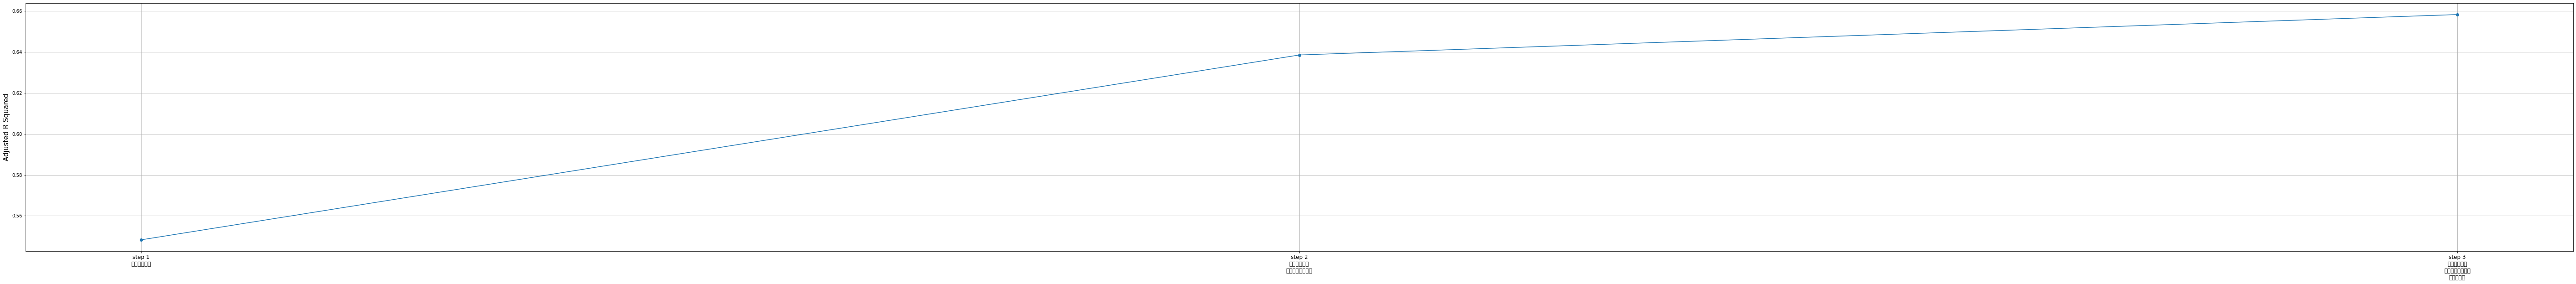

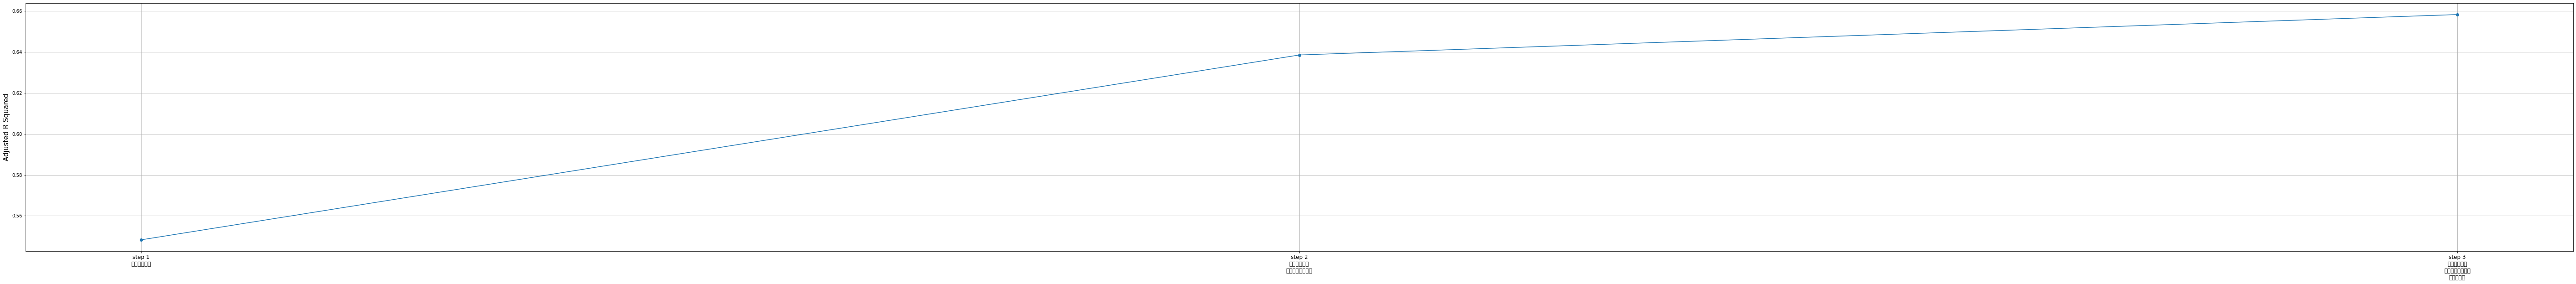

In [34]:
def stepwise_feature_selection(X_train, y_train, variables=X.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X, y)

In [35]:
import statsmodels.api as sm
model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected_variables]))).fit(disp=0)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   인구사회   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     111.5
Date:                Sun, 12 Jun 2022   Prob (F-statistic):           7.55e-40
Time:                        01:31:06   Log-Likelihood:                -3.1368
No. Observations:                 173   AIC:                             14.27
Df Residuals:                     169   BIC:                             26.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4523      0.090      5.048      0.0

In [36]:
df_new

,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


,시군구명,과거대비인구변화,최근인구변화,과거대비사업체변화,최근사업체변화,노후건축물비율,인구사회,여성종사자비율,20세미만인구성장률,재정자립도,...,도로밀도,1만인당공무원수,건축허가면적증감률,주민등록인구전출입률,폐기물재활용률,1만인당사회복지시설수,1만인당문화체육시설수,1만인당축제건수,비영리단체수,비영리단체수등급
0,강원도 양양군,-30.05,3.0,3.63,0.0,39.42,1.0,44.38,-2.20,13.58,...,0.91,202.61,-0.210000,2.03,77.030000,58.000000,35.57,1.16,6.0,1.0
1,전라남도 여수시,-14.27,5.0,3.16,0.0,64.64,1.0,34.41,-4.49,36.85,...,3.02,67.65,-9.950000,-0.11,74.410000,41.143643,30.89,0.23,79.0,6.0
2,경상북도 봉화군,-60.15,5.0,1.37,0.0,65.72,1.0,30.42,-6.30,8.97,...,0.84,204.83,-41.550000,-1.15,79.500000,92.860000,23.80,1.01,6.0,1.0
5,충청남도 서천군,-51.49,5.0,2.50,1.0,57.18,1.0,47.52,-5.09,13.09,...,1.94,99.73,0.303861,-1.09,87.137152,71.030000,17.66,1.61,18.0,1.0
6,경상남도 함안군,-9.07,4.0,4.24,1.0,32.75,1.0,29.15,-4.97,25.42,...,1.64,82.41,39.540000,-1.52,87.360000,58.770000,14.09,0.16,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,충청북도 증평군,-12.12,1.0,4.11,0.0,54.44,0.0,39.32,-3.81,17.63,...,3.40,113.31,-6.710000,0.10,84.200000,41.143643,39.61,0.55,13.0,1.0
223,충청남도 부여군,-49.99,5.0,-1.59,2.0,70.87,1.0,44.41,-8.30,14.33,...,0.27,86.54,0.303861,-0.95,87.137152,77.240000,14.03,0.47,11.0,1.0
224,울산광역시 울주군,12.15,1.0,2.81,0.0,41.07,0.0,27.81,-3.20,45.97,...,0.81,46.99,-38.450000,0.51,80.990000,21.760000,16.71,0.14,42.0,4.0
226,전라남도 장흥군,-59.47,4.0,3.91,1.0,65.19,1.0,45.09,-5.91,11.33,...,0.82,175.39,26.180000,-1.17,95.080000,41.143643,29.42,1.44,16.0,1.0


In [37]:
from sklearn.preprocessing import StandardScaler

data = df_new[['최근인구변화', '과거대비인구변화',  '재정자립도']]

std = StandardScaler()
std_data = std.fit_transform(data)


KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=3), k=None)

KElbowVisualizer(ax=<AxesSubplot:>, estimator=KMeans(n_clusters=3), k=None)

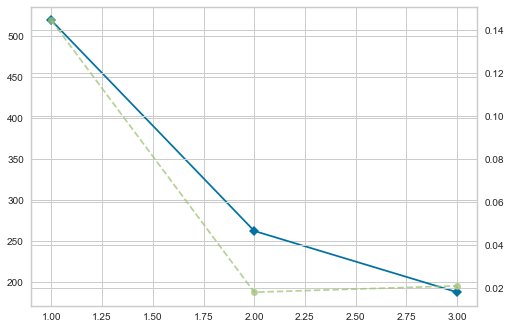

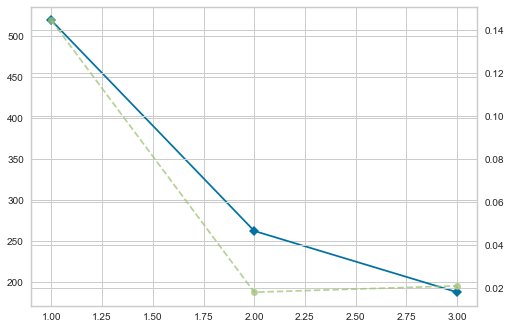

In [38]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,4))
visualizer.fit(std_data)

In [39]:
model = KMeans(n_clusters =3, random_state = 20)

In [40]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(std_data)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df_new['cluster'] = model.fit_predict(std_data)

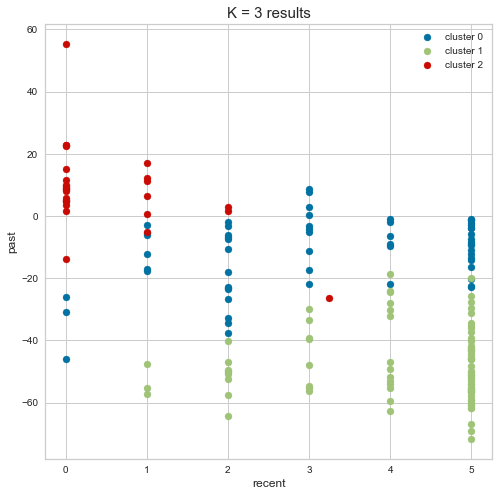

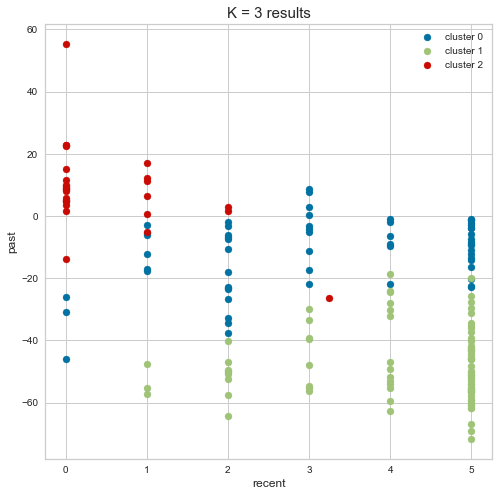

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(3):
    plt.scatter(df_new.loc[df_new['cluster'] == i, '최근인구변화'], df_new.loc[df_new['cluster'] == i, '과거대비인구변화'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('recent', size = 12)
plt.ylabel('past', size = 12)
plt.show()

In [42]:
df_new.to_csv('clusterafter.csv')

In [43]:
import folium
import json

In [60]:
geo_path = 'Data/sig_wgs84.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [45]:
df_sg = df2[['시군구명', '시군구코드']]

In [46]:
df_clust = df_new[['시군구명', 'cluster']]

In [47]:
df_map = pd.merge(df_sg, df_clust, how='inner', on='시군구명')

In [48]:
df_map

,시군구명,시군구코드,cluster
0,부산광역시 해운대구,26350,0
1,부산광역시 사상구,26530,0
2,대구광역시 남구,27200,1
3,인천광역시 강화군,28710,0
4,광주광역시 북구,29170,0
...,...,...,...
168,전라남도 장성군,46880,1
169,전라남도 완도군,46890,1
170,전라남도 신안군,46910,1
171,경상북도 봉화군,47920,1


,시군구명,시군구코드,cluster
0,부산광역시 해운대구,26350,0
1,부산광역시 사상구,26530,0
2,대구광역시 남구,27200,1
3,인천광역시 강화군,28710,0
4,광주광역시 북구,29170,0
...,...,...,...
168,전라남도 장성군,46880,1
169,전라남도 완도군,46890,1
170,전라남도 신안군,46910,1
171,경상북도 봉화군,47920,1


In [49]:
df_map['시군구코드'] = df_map.시군구코드.map(lambda x : str(x).zfill(5))

In [50]:
df_map.drop('시군구명', axis=1, inplace=True)

In [52]:
df_map

,시군구코드,cluster
0,26350,0
1,26530,0
2,27200,1
3,28710,0
4,29170,0
...,...,...
168,46880,1
169,46890,1
170,46910,1
171,47920,1


,시군구코드,cluster
0,26350,0
1,26530,0
2,27200,1
3,28710,0
4,29170,0
...,...,...
168,46880,1
169,46890,1
170,46910,1
171,47920,1


In [66]:
m = folium.Map(location=[36, 127], tiles="OpenStreetMap", zoom_start=7)

m.choropleth(
    geo_data=geo_str,
    name='활성화지표',
    data=df_map,
    columns=['시군구코드', 'cluster'],
    key_on='feature.properties.SIG_CD',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.3,
    color = 'gray',
    legend_name = 'activation'
)

# https://blog.naver.com/yun9706/222454846442

In [ ]:
folium.LayerControl().add_to(m)

# Save to html
m.save('folium_kr.html')